In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)    
# This is for neural network which is having no hidden layers

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9253


[0.2715352475643158, 0.9253000020980835]

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[0]



313/313 [==============================] - 0s 1ms/step


array([1.1250988e-02, 3.7043091e-07, 6.3549764e-02, 9.5467782e-01,
       2.4233933e-03, 8.6482964e-02, 1.7371370e-06, 9.9971819e-01,
       7.2638266e-02, 6.3480914e-01], dtype=float32)

In [ ]:
np.argmax(Y_predicted[0])

7

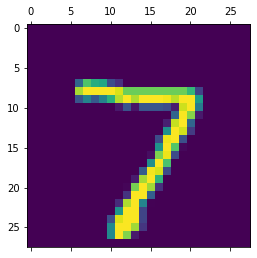

In [ ]:
plt.matshow(X_test[0])


Text(69.0, 0.5, 'Truth')

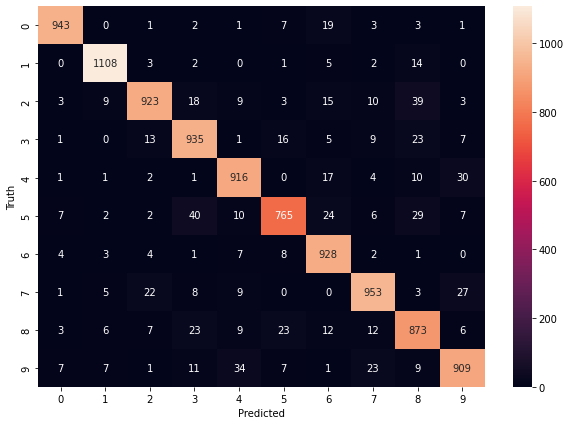

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train_flattened, Y_train, epochs=5)
# This is using one hidden layer

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1254 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0890 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0683 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0554 - accuracy: 0.9826


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9253


[0.2715352475643158, 0.9253000020980835]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

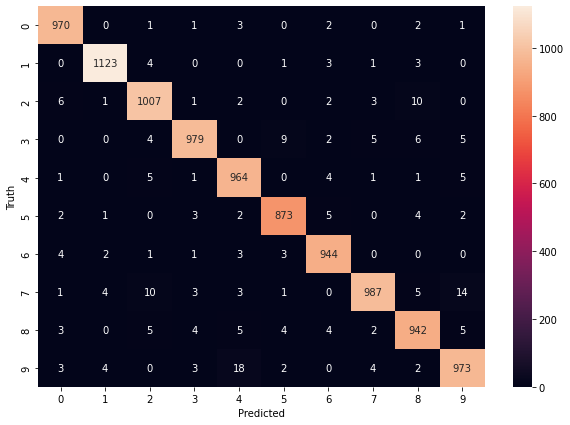

In [ ]:
Y_predicted = model1.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, Y_train, epochs=10)
# If we donot want to explictly flatten the train data keras has an inbuilt function keras.Flatten to directly Flatten the data

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2719 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1215 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0852 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0644 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [ ]:
model2.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9760


[0.08765660226345062, 0.9760000109672546]